#### Libraries

In [27]:
import pandas as pd
import numpy as np
import sys
import os

In [51]:
product_detail = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\product_details.csv")
store_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\store_info.csv")
supplier_info = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\supplier_info.csv")
weather_data = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weather_data.csv")
weekly_sales = pd.read_csv(r"C:\Users\akann\OneDrive\Desktop\AMDARI\Project 2 - PREDICTIVE MODELLING\Predictive Modeling\Predictive-Modelling\Datasets\weekly_sales.csv")

In [52]:
# Merge all five datasets

merged_data = pd.merge(product_detail, weekly_sales, on="Product_ID", how="inner").merge(
    store_info, on="Store_ID", how="inner"
).merge(supplier_info, on="Supplier_ID", how="inner").merge(
    weather_data, on=["Region", "Week_Number"], how="inner"
)

merged_data

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Week_Number,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,...,Price,Region,Store_Size,Cold_Storage_Capacity,Supplier_Name,Lead_Time_Days,Supply_Capacity,Avg_Temperature,Rainfall,Holiday_Flag
0,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,500,4853,670.37,0,...,2.46,London,12000,3788,PremiumGoods Wholesale,3,48776,9.9,23.0,1
1,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,501,1911,1280.28,0,...,3.76,Midlands,5000,1086,PremiumGoods Wholesale,3,48776,7.4,32.1,0
2,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,502,3080,1509.55,0,...,3.81,North East,4000,998,PremiumGoods Wholesale,3,48776,6.4,32.4,0
3,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,503,2856,1101.11,0,...,1.09,Midlands,5000,1243,PremiumGoods Wholesale,3,48776,7.4,32.1,0
4,1000,Whole Wheat Bread 800g,Bakery,4,4,2024-W01,504,3211,1701.66,0,...,2.72,London,10000,3330,PremiumGoods Wholesale,3,48776,9.9,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,1047,Green Tea 40bags,Beverages,92,3,2024-W52,510,1368,1157.55,0,...,1.56,North East,3000,784,FarmDirect Suppliers Ltd.,2,71976,5.2,19.2,1
37436,1047,Green Tea 40bags,Beverages,92,3,2024-W52,511,940,1159.28,0,...,6.49,South West,3000,634,FarmDirect Suppliers Ltd.,2,71976,8.7,16.2,1
37437,1047,Green Tea 40bags,Beverages,92,3,2024-W52,512,1458,662.90,0,...,4.86,South East,5000,1697,FarmDirect Suppliers Ltd.,2,71976,13.7,10.1,1
37438,1047,Green Tea 40bags,Beverages,92,3,2024-W52,513,1311,694.10,0,...,7.36,South West,4000,1322,FarmDirect Suppliers Ltd.,2,71976,8.7,16.2,1


In [53]:
# Convert Week_Number to Year, Month & Day
weekly_sales['Week_Number'] = weekly_sales['Week_Number'].astype(str)

# Convert ISO week (YYYY-Www) to actual date (Monday of that week)
weekly_sales['Week_Start_Date'] = pd.to_datetime(
    weekly_sales['Week_Number'] + '-1',   # Add weekday (Monday)
    format='%G-W%V-%u',
    errors='coerce'
)

# Extract individual components
weekly_sales['Year'] = weekly_sales['Week_Start_Date'].dt.year
weekly_sales['Month'] = weekly_sales['Week_Start_Date'].dt.month
weekly_sales['Day'] = weekly_sales['Week_Start_Date'].dt.day

weekly_sales[['Week_Number', 'Week_Start_Date', 'Year', 'Month', 'Day']].head()

,Week_Number,Week_Start_Date,Year,Month,Day
0,2024-W01,2024-01-01,2024,1,1
1,2024-W01,2024-01-01,2024,1,1
2,2024-W01,2024-01-01,2024,1,1
3,2024-W01,2024-01-01,2024,1,1
4,2024-W01,2024-01-01,2024,1,1


In [54]:
# Drop Week_Start_Date from weekly_sales
weekly_sales = weekly_sales.drop(columns=['Week_Start_Date'], errors='ignore')

# Ensure merge keys exist
keys = ['Product_ID', 'Store_ID', 'Week_Number']

# Merge Year, Month, Day into merged_data
merged_data = merged_data.merge(
    weekly_sales[keys + ['Year', 'Month', 'Day']],
    on=keys,
    how='left'
)

# Drop Week_Number from merged_data
merged_data = merged_data.drop(columns=['Week_Number'])

# Updated columns
merged_data[['Product_ID', 'Store_ID', 'Year', 'Month', 'Day']].head()


,Product_ID,Store_ID,Year,Month,Day
0,1000,500,2024,1,1
1,1000,501,2024,1,1
2,1000,502,2024,1,1
3,1000,503,2024,1,1
4,1000,504,2024,1,1


In [55]:
for df in [merged_data]:
    if 'Week_Number' in df.columns:
        df.drop(columns=['Week_Number'], inplace=True)


In [56]:
list(merged_data.columns)

['Product_ID',
 'Product_Name',
 'Product_Category',
 'Shelf_Life_Days',
 'Supplier_ID',
 'Store_ID',
 'Units_Sold',
 'Marketing_Spend',
 'Discount_Percent',
 'Wastage_Units',
 'Price',
 'Region',
 'Store_Size',
 'Cold_Storage_Capacity',
 'Supplier_Name',
 'Lead_Time_Days',
 'Supply_Capacity',
 'Avg_Temperature',
 'Rainfall',
 'Holiday_Flag',
 'Year',
 'Month',
 'Day']

#### FEATURE SELECTION with mutual info regression

In [57]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

In [94]:
data_mutual = merged_data.copy()
print(data_mutual.columns)

Index(['Product_ID', 'Product_Name', 'Product_Category', 'Shelf_Life_Days',
       'Supplier_ID', 'Store_ID', 'Units_Sold', 'Marketing_Spend',
       'Discount_Percent', 'Wastage_Units', 'Price', 'Region', 'Store_Size',
       'Cold_Storage_Capacity', 'Supplier_Name', 'Lead_Time_Days',
       'Supply_Capacity', 'Avg_Temperature', 'Rainfall', 'Holiday_Flag',
       'Year', 'Month', 'Day'],
      dtype='object')


In [97]:
merged_data['Wastage_Rate_trend'] = (
    merged_data.groupby(['Product_ID', 'Store_ID'])['Wastage_Units']
    .rolling(4)
    .mean()
    .reset_index(level=[0,1], drop=True)
)

                  Feature  Mutual Information
5           Wastage_Units            3.512989
19     Wastage_Rate_trend            0.404558
1        Product_Category            0.332152
0            Product_Name            0.329285
2         Shelf_Life_Days            0.243879
6                   Price            0.158905
9   Cold_Storage_Capacity            0.141617
7                  Region            0.139931
8              Store_Size            0.134163
14               Rainfall            0.082138
13        Avg_Temperature            0.075855
12        Supply_Capacity            0.071937
10          Supplier_Name            0.070234
3         Marketing_Spend            0.031163
17                  Month            0.018622
4        Discount_Percent            0.014282
11         Lead_Time_Days            0.010383
18                    Day            0.010221
15           Holiday_Flag            0.000000
16                   Year            0.000000


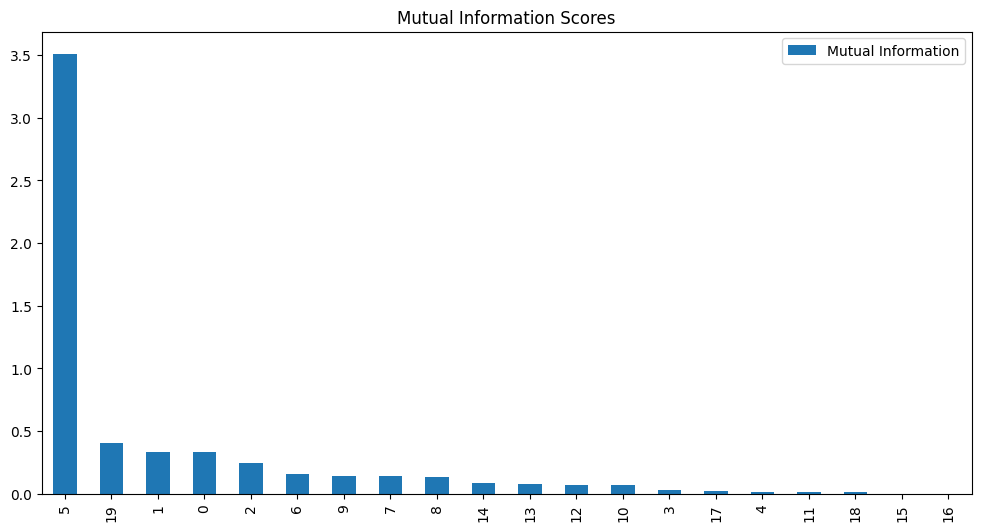

In [98]:
mutual_data = merged_data.copy()

for col in mutual_data.select_dtypes(include=['object']).columns:
    mutual_data[col] = pd.Categorical(mutual_data[col]).codes

target = mutual_data['Units_Sold']
features = mutual_data.drop(columns=['Units_Sold', 'Product_ID', 'Store_ID', 'Supplier_ID'])
features = features.fillna(features.median())
target = target.fillna(target.median)
mi_scores = mutual_info_regression(features, target)
mi_scores = mi_scores = pd.DataFrame({
    'Feature': features.columns,
    'Mutual Information': mi_scores
})
mi_scores = mi_scores.sort_values(by='Mutual Information', ascending=False)
print(mi_scores)

mi_scores.plot(kind='bar', figsize=(12, 6))
plt.title('Mutual Information Scores')
plt.show()

In [100]:
training_features = mi_scores.head(16)['Feature'].tolist()
training_features

['Wastage_Units',
 'Wastage_Rate_trend',
 'Product_Category',
 'Product_Name',
 'Shelf_Life_Days',
 'Price',
 'Cold_Storage_Capacity',
 'Region',
 'Store_Size',
 'Rainfall',
 'Avg_Temperature',
 'Supply_Capacity',
 'Supplier_Name',
 'Marketing_Spend',
 'Month',
 'Discount_Percent']

#### Feature Encoding

In [101]:
print(merged_data[training_features].select_dtypes(include=['object']).nunique())

main_data = merged_data[training_features].copy()
merged_data[training_features].select_dtypes(include=['object'])

Product_Category     4
Product_Name        48
Region               6
Supplier_Name       10
dtype: int64


,Product_Category,Product_Name,Region,Supplier_Name
0,Bakery,Whole Wheat Bread 800g,London,PremiumGoods Wholesale
1,Bakery,Whole Wheat Bread 800g,Midlands,PremiumGoods Wholesale
2,Bakery,Whole Wheat Bread 800g,North East,PremiumGoods Wholesale
3,Bakery,Whole Wheat Bread 800g,Midlands,PremiumGoods Wholesale
4,Bakery,Whole Wheat Bread 800g,London,PremiumGoods Wholesale
...,...,...,...,...
37435,Beverages,Green Tea 40bags,North East,FarmDirect Suppliers Ltd.
37436,Beverages,Green Tea 40bags,South West,FarmDirect Suppliers Ltd.
37437,Beverages,Green Tea 40bags,South East,FarmDirect Suppliers Ltd.
37438,Beverages,Green Tea 40bags,South West,FarmDirect Suppliers Ltd.


In [102]:
merged_data.head(3)

,Product_ID,Product_Name,Product_Category,Shelf_Life_Days,Supplier_ID,Store_ID,Units_Sold,Marketing_Spend,Discount_Percent,Wastage_Units,...,Supplier_Name,Lead_Time_Days,Supply_Capacity,Avg_Temperature,Rainfall,Holiday_Flag,Year,Month,Day,Wastage_Rate_trend
0,1000,Whole Wheat Bread 800g,Bakery,4,4,500,4853,670.37,0,718,...,PremiumGoods Wholesale,3,48776,9.9,23.0,1,2024,1,1,NaN
1,1000,Whole Wheat Bread 800g,Bakery,4,4,501,1911,1280.28,0,282,...,PremiumGoods Wholesale,3,48776,7.4,32.1,0,2024,1,1,NaN
2,1000,Whole Wheat Bread 800g,Bakery,4,4,502,3080,1509.55,0,455,...,PremiumGoods Wholesale,3,48776,6.4,32.4,0,2024,1,1,NaN


In [103]:
norminal_columns = ['Product_Category', 'Region']
high_cardinality_columns = ['Product_Name', 'Supplier_Name']

for col in norminal_columns:
    dummies = pd.get_dummies(main_data[col], prefix=col)
    dummies = dummies.astype(int)
    main_data = pd.concat([main_data, dummies], axis=1)
    main_data.drop(columns=[col], inplace=True)

In [104]:
for col in high_cardinality_columns:
    target_mean = main_data.groupby(col)['Price'].mean()
    main_data[col] = main_data[col].map(target_mean)

In [105]:
main_data.dtypes

Wastage_Units                   int64
Wastage_Rate_trend            float64
Product_Name                  float64
Shelf_Life_Days                 int64
Price                         float64
Cold_Storage_Capacity           int64
Store_Size                      int64
Rainfall                      float64
Avg_Temperature               float64
Supply_Capacity                 int64
Supplier_Name                 float64
Marketing_Spend               float64
Month                           int32
Discount_Percent                int64
Product_Category_Bakery         int64
Product_Category_Beverages      int64
Product_Category_Dairy          int64
Product_Category_Meat           int64
Region_London                   int64
Region_Midlands                 int64
Region_North East               int64
Region_North West               int64
Region_South East               int64
Region_South West               int64
dtype: object

In [106]:
main_data['Units_Sold'] = merged_data['Units_Sold'].values
main_data

,Wastage_Units,Wastage_Rate_trend,Product_Name,Shelf_Life_Days,Price,Cold_Storage_Capacity,Store_Size,Rainfall,Avg_Temperature,Supply_Capacity,...,Product_Category_Beverages,Product_Category_Dairy,Product_Category_Meat,Region_London,Region_Midlands,Region_North East,Region_North West,Region_South East,Region_South West,Units_Sold
0,718,NaN,2.439103,4,2.46,3788,12000,23.0,9.9,48776,...,0,0,0,1,0,0,0,0,0,4853
1,282,NaN,2.439103,4,3.76,1086,5000,32.1,7.4,48776,...,0,0,0,0,1,0,0,0,0,1911
2,455,NaN,2.439103,4,3.81,998,4000,32.4,6.4,48776,...,0,0,0,0,0,1,0,0,0,3080
3,422,NaN,2.439103,4,1.09,1243,5000,32.1,7.4,48776,...,0,0,0,0,1,0,0,0,0,2856
4,475,NaN,2.439103,4,2.72,3330,10000,23.0,9.9,48776,...,0,0,0,1,0,0,0,0,0,3211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37435,34,21.00,4.146833,92,1.56,784,3000,19.2,5.2,71976,...,1,0,0,0,0,1,0,0,0,1368
37436,23,29.00,4.146833,92,6.49,634,3000,16.2,8.7,71976,...,1,0,0,0,0,0,0,0,1,940
37437,36,34.25,4.146833,92,4.86,1697,5000,10.1,13.7,71976,...,1,0,0,0,0,0,0,1,0,1458
37438,32,26.50,4.146833,92,7.36,1322,4000,16.2,8.7,71976,...,1,0,0,0,0,0,0,0,1,1311


#### BUILDING BASE MODEL

In [17]:
def train_linear_model(data):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
    from sklearn.impute import SimpleImputer

    y = data['Units_Sold']
    X = data.drop(columns=['Units_Sold'], axis=1)

    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)
    
    y_imputed = y.fillna(y.median())

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

    return model    

In [18]:
model = train_linear_model(main_data)

RMSE: 461.24714915420344
R2: 0.8455963186727236
MAE: 318.63384670012783
MAPE: 0.23417537417381545


In [19]:
def train_decision_model(data):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

    y = data['Units_Sold']
    X = data.drop(columns=['Units_Sold'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

    return model    

In [22]:
def train_decision_tree_model(data):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

    y = data['Units_Sold']
    X = data.drop(columns=['Units_Sold'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

    return model

In [23]:
model = train_decision_tree_model(main_data)

RMSE: 27.45435622209708
R2: 0.9994529679277169
MAE: 9.085648148148149
MAPE: 0.006835963245947001


In [24]:
#!pip install xgboost 

In [25]:
def train_xgb_model(data):
    from xgboost import XGBRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
    import numpy as np

    y = data['Units_Sold']
    X = data.drop(columns=['Units_Sold'], axis=1)

    #X = X.select_dtypes(include=[np.number]).fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    import pickle
    with open('rf_model.pkl', 'wb') as file:
        pickle.dump(model, file)
        
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Print results
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

    return model

In [26]:
model = train_xgb_model(main_data)

RMSE: 87.60443544350366
R2: 0.9944301843643188
MAE: 20.910367965698242
MAPE: 0.010927627794444561


In [27]:
def train_random_forest_model(data):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

    y = data['Units_Sold']
    X = data.drop(columns=['Units_Sold'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    import pickle
    with open('rf_model.pkl', 'wb') as file:
        pickle.dump(model, file)
    
    import json
    with open('schema.json', 'w') as f:
        json.dump({"features": X.columns.tolist()}, f)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

    return model    

In [28]:
model = train_random_forest_model(main_data)

RMSE: 29.141899801048808
R2: 0.9993836520127649
MAE: 7.6696583931115185
MAPE: 0.005582952347486636


#### Model Performance Summary
The performance of four regression models was evaluated using standard metrics including RMSE, R², MAE, and MAPE.
- Linear Regression recorded an RMSE of 461.25, R² of 0.85, MAE of 318.63, and MAPE of 0.23.
- Decision Tree achieved an RMSE of 27.45, R² of 0.9995, MAE of 9.09, and MAPE of 0.0068. While the performance metrics appear excellent, such near-perfect results suggest overfitting, meaning the model may not generalize well to unseen data.
- XGBoost showed strong performance with an RMSE of 87.60, R² of 0.9944, MAE of 20.91, and MAPE of 0.011. The model demonstrates high predictive accuracy and robustness, though further hyperparameter tuning could enhance its generalization capability.
- Random Forest produced an RMSE of 30.00, R² of 0.9993, MAE of 7.69, and MAPE of 0.0056. RF model offered the best balance accuracy and generalization, showing low error and excellent fit without signs of severe overfitting. It effectively captures complex patterns in the data, maintains strong generalization, and provides stable, accurate predictions making it the most reliable model.